In [1]:
# =============================================================================
# LAB 3: UNINFORMED SEARCH ALGORITHMS
# =============================================================================
"""
LEARNING OBJECTIVES:
In this lab, you will implement three fundamental graph search algorithms:

1. BREADTH-FIRST SEARCH (BFS): Explores nodes level by level using a FIFO queue.
   - Guarantees the shortest path in unweighted graphs.

2. DEPTH-FIRST SEARCH (DFS): Explores as deep as possible using a LIFO stack.
   - Memory-efficient, but may not find the shortest path.

3. UNIFORM COST SEARCH (UCS): Finds the lowest-cost path using a priority queue.
   - Considers edge weights for optimal solutions (Dijkstra’s algorithm).

4. UNIT TESTING: Write tests to verify correctness and edge-case behavior.
   - Ensures each algorithm performs as expected.

CORE CONCEPT:
Search algorithms differ in how they manage their frontier (queue, stack, or priority queue)
and in what guarantees they provide (shortest path, any path, or minimum cost).
Understanding these trade-offs is key to selecting the right algorithm for a problem.

YOUR TASK:
Implement BFS, DFS, and UCS on undirected graphs, then write unit tests to validate them.
"""

# Core imports for graph manipulation and visualization
from lab2 import visualize_network
import networkx as nx
import numpy as np

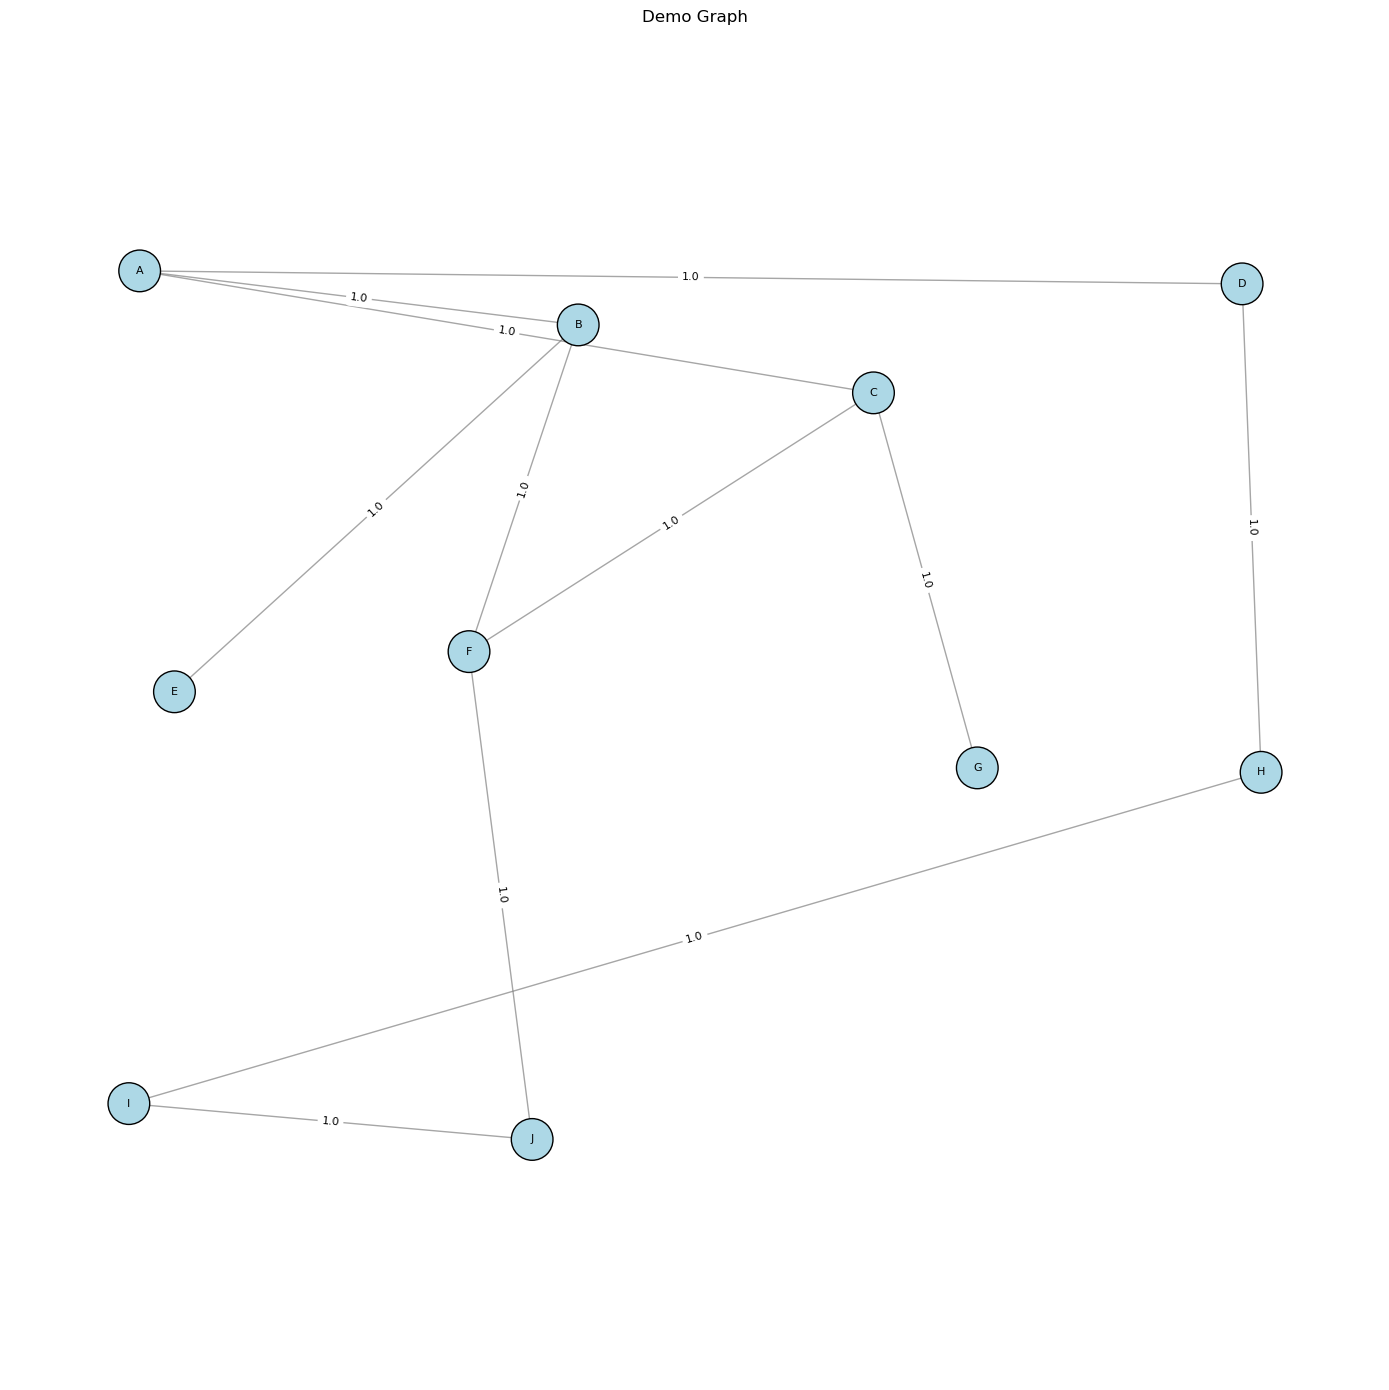

In [2]:
# =============================================================================
# GRAPH SETUP: CREATE A SIMPLE TEST GRAPH TO PROTOTYPE SEARCH ALGORITHMS
# =============================================================================

import networkx as nx
import numpy as np

def create_graph():
    """Graph designed to stress BFS memory usage from A → F with maximal branching."""
    G = nx.Graph()
    edges = [
        ("A","B"), ("A","C"), ("A","D"),
        ("B","E"), ("B","F"),
        ("C","G"), ("C","F"),
        ("D","H"),
        ("H","I"), ("I","J"), ("J","F")
    ]
    G.add_edges_from(edges)
    return G

# Create the demonstration graph
demo_graph = create_graph()

# Prepare the inputs expected by visualize_network()
nodes = list(demo_graph.nodes())

# Create a simple distance matrix (1 for connected pairs, 0 on diagonal)
distance_matrix = np.ones((len(nodes), len(nodes)))
np.fill_diagonal(distance_matrix, 0)

# Visualize the graph
visualize_network(
    demo_graph,
    distance_matrix=distance_matrix,
    nodes=nodes,
    title="Demo Graph"
)

🎯 Searching from 'A' to 'F' using BFS
📊 Graph has 10 nodes and 11 edges

🔍 BREADTH-FIRST SEARCH (BFS)
Starting BFS from A to F

--- Step 1 ---
Frontier queue/stack: ['A'] (depths: [0]) | size=1
Popped node: A
Expanding A at depth 0
Neighbors: ['B', 'C', 'D']
Unvisited Neighbors: ['B', 'C', 'D']
Enqueuing successors at depth 1

--- Step 2 ---
Frontier queue/stack: ['B', 'C', 'D'] (depths: [1, 1, 1]) | size=3
Popped node: B
Expanding B at depth 1
Neighbors: ['A', 'E', 'F']
Unvisited Neighbors: ['E', 'F']
Enqueuing successors at depth 2

--- Step 3 ---
Frontier queue/stack: ['C', 'D', 'E', 'F'] (depths: [1, 1, 2, 2]) | size=4
Popped node: C
Expanding C at depth 1
Neighbors: ['A', 'G', 'F']
Unvisited Neighbors: ['G', 'F']
Enqueuing successors at depth 2

--- Step 4 ---
Frontier queue/stack: ['D', 'E', 'F', 'G', 'F'] (depths: [1, 2, 2, 2, 2]) | size=5
Popped node: D
Expanding D at depth 1
Neighbors: ['A', 'H']
Unvisited Neighbors: ['H']
Enqueuing successors at depth 2

--- Step 5 ---
Fronti

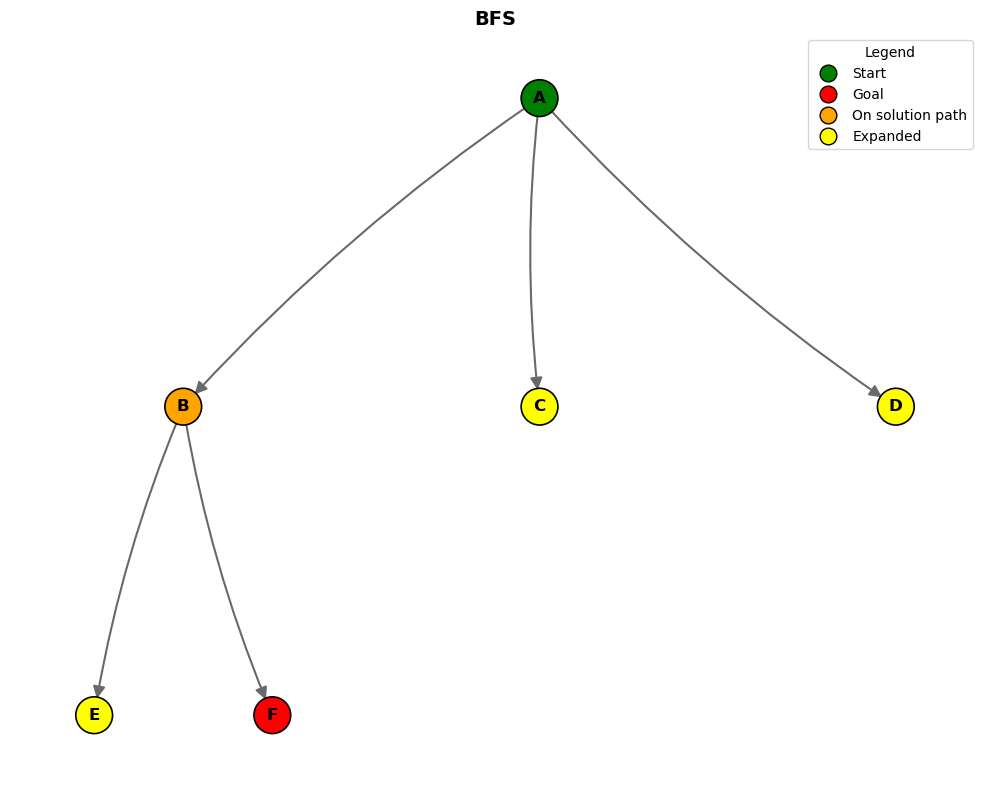

In [3]:
# =============================================================================
# DEMONSTRATION: RUNNING SEARCH ALGORITHMS ON YOUR GRAPH
# =============================================================================

# Import your implemented search function
from uninformed-informed-searches import breadth_first_search, visualize_search_tree

# USER CONFIGURATION: Choose your start and end nodes
start_node = "A"
end_node = "F"

print(f"🎯 Searching from '{start_node}' to '{end_node}' using BFS")
print(f"📊 Graph has {len(demo_graph.nodes())} nodes and {len(demo_graph.edges())} edges")

print("\n" + "="*60)
print("🔍 BREADTH-FIRST SEARCH (BFS)")
print("="*60)

path, expanded, tree_edges, max_depth = breadth_first_search(demo_graph, start_node, end_node)

print(f"\n📊 BFS RESULTS:")
print(f"   Path found: {path}")
print(f"   Nodes expanded: {expanded}")
print(f"   Tree edges: {tree_edges}")
print(f"   Max depth reached: {max_depth}")
print(f"   Path length: {len(path)-1 if path else 0} edges")

if path:
    print("✅ SUCCESS: BFS found the shortest path!")
    visualize_search_tree(tree_edges, start_node, end_node, path, expanded, "BFS")
else:
    print("❌ FAILURE: No path exists between these nodes")

In [4]:
# =============================================================================
# DEMONSTRATION: RUNNING SEARCH ALGORITHMS ON YOUR GRAPH
# =============================================================================

# Import your implemented search function
from uninformed-informed-searches import depth_first_search


# USER CONFIGURATION: Choose your start and end nodes
start_node = "A"
end_node = "F"

print(f"🎯 Searching from '{start_node}' to '{end_node}' using BFS")
print(f"📊 Graph has {len(demo_graph.nodes())} nodes and {len(demo_graph.edges())} edges")

print("\n" + "="*60)
print("🔍 DEPTH-FIRST SEARCH (DFS)")
print("="*60)

# Uncomment this block when you've implemented bfs_search()
path, expanded, tree_edges, max_depth = depth_first_search(demo_graph, start_node, end_node)

print(f"\n📊 DFS RESULTS:")
print(f"   Path found: {path}")
print(f"   Nodes expanded: {expanded}")
print(f"   Tree edges: {tree_edges}")
print(f"   Max depth reached: {max_depth}")
print(f"   Path length: {len(path)-1 if path else 0} edges")

if path:
    print("✅ SUCCESS: DFS found the shortest path!")
    visualize_search_tree(tree_edges, start_node, end_node, path, expanded, "DFS")
else:
    print("❌ FAILURE: No path exists between these nodes")

🎯 Searching from 'A' to 'F' using BFS
📊 Graph has 10 nodes and 11 edges

🔍 DEPTH-FIRST SEARCH (DFS)


UnboundLocalError: cannot access local variable 'stack' where it is not associated with a value

In [ ]:
# =============================================================================
# REAL-WORLD APPLICATION: SEARCH ALGORITHMS ON TEXT NETWORKS
# =============================================================================
print("🌐 TEXT NETWORK ANALYSIS")
print("=" * 65)

from lab2 import process_text_network

# Process lyrics to create word adjacency network
source = "https://raw.githubusercontent.com/adveith/Music-Recommender-for-Mental-Health-Well-being/9d6b0125cc4f44eacfa2ce9d3c788df14dd8f951/lyrics/Ordinary%20-%20Alex%20Warren.txt"
results = process_text_network(source, rare_threshold=0.005)

# Extract results
text_graph = results['graph']
nodes = results['nodes']
distance_matrix = results['distance_matrix']

# Statistics
print(f"\n📊 NETWORK STATS:")
print(f"   Nodes: {len(text_graph.nodes())}")
print(f"   Edges: {len(text_graph.edges())}")
print(f"   Connected: {nx.is_connected(text_graph)}")

# Visualize network
print("\n📈 VISUALIZING NETWORK...")
visualize_network(
    text_graph,
    distance_matrix=distance_matrix,
    nodes=nodes,
    title="Text Network - Word Adjacencies"
)

In [ ]:
# =============================================================================
# TESTING YOUR SEARCH ALGORITHM: FINDING PATHS IN TEXT
# =============================================================================
print("🎯 BFS ON REAL TEXT NETWORK")
print("=" * 55)
print("Finding paths between words that appeared in the song lyrics.\n")

from uninformed-informed-searches import breadth_first_search

# Choose start and end nodes
start_node = "clouds"
end_node = "day"

print(f"🔍 Searching: '{start_node}' → '{end_node}'")
print("=" * 55)

path, expanded, bfs_edges, max_depth = breadth_first_search(
    results['graph'],
    start_node,
    end_node
)

print("\n======== RESULTS ========")
print(f"Path: {path}")
print(f"Expanded: {expanded}")
print(f"Max depth: {max_depth}")

if path:
    visualize_search_tree(bfs_edges, start_node, end_node, path, expanded)

In [ ]:
# =============================================================================
# DEPTH-FIRST SEARCH: FOLLOWING ONE WORD THREAD
# =============================================================================
print("🔍 DFS: DEEP EXPLORATION STRATEGY")
print("=" * 55)
print("DFS dives deep along one path before backtracking.")
print("• May find LONGER paths (not shortest)")
print("• Explores FEWER nodes (if lucky)")
print("• Uses LESS memory (stack vs queue)\n")

from uninformed-informed-searches import depth_first_search

start_node = "clouds"
end_node = "day"

print(f"Searching: '{start_node}' → '{end_node}'")
print("=" * 55)

path, expanded, dfs_edges, max_depth = depth_first_search(
    results['graph'],
    start_node,
    end_node
)

print("\n======== RESULTS ========")
print(f"Path: {path}")
print(f"Expanded: {expanded}")
print(f"Max depth: {max_depth}")

if path:
    visualize_search_tree(dfs_edges, start_node, end_node, path, expanded)

print("\n📊 COMPARE TO BFS:")
print("• Path length difference?")
print("• Nodes expanded difference?")

In [ ]:
# =============================================================================
# UNIFORM COST SEARCH: OPTIMAL PATHFINDING
# =============================================================================
print("💰 UCS: FINDING MINIMUM-COST PATHS")
print("=" * 55)
print("UCS uses the distance matrix from Lab 2 as edge weights.")
print("• BFS/DFS: All edges equal (unweighted)")
print("• UCS: Uses distance_matrix values as edge costs")
print("• Finds path with minimum total distance\n")

from uninformed-informed-searches import uniform_cost_search

start_node = "clouds"
end_node = "day"

print(f"Searching: '{start_node}' → '{end_node}'")
print("=" * 55)

path, expanded, ucs_edges, max_depth, cost = uniform_cost_search(
    results['graph'],
    start_node,
    end_node,
    distance_matrix=results['distance_matrix']
)

print("\n======== RESULTS ========")
print(f"Path: {path}")
print(f"Total cost: ${cost:.1f}" if cost else "None")
print(f"Expanded: {expanded}")
print(f"Max depth: {max_depth}")

if path:
    visualize_search_tree(
        ucs_edges,
        start_node,
        end_node,
        path,
        expanded,
        show_distances=True,
        distance_matrix=results['distance_matrix'],
        nodes=results['nodes']
    )

print("\n📈 COMPARE TO BFS/DFS:")
print("• How do path lengths and costs differ?")

In [ ]:
# BFS PATH WITH COST INFORMATION
print("\n🔄 RETROSPECTIVE: BFS Path with Costs Revealed")
print("=" * 60)
print("BFS found the SHORTEST path but was blind to edge costs.")
print("Let's see what BFS's path actually cost!\n")

# Calculate total cost
node_index = {node: i for i, node in enumerate(results['nodes'])}
total_cost = 0
for i in range(len(path) - 1):
    u, v = path[i], path[i + 1]
    if u in node_index and v in node_index:
        total_cost += results['distance_matrix'][node_index[u], node_index[v]]

print(f"BFS Path: {' → '.join(path)}")
print(f"Path Length: {len(path) - 1} edges")
print(f"💰 TOTAL COST: ${total_cost:.2f}\n")

# Visualize with costs
visualize_search_tree(
    bfs_edges, start_node, end_node, path, expanded,
    show_distances=True,
    distance_matrix=results['distance_matrix'],
    nodes=results['nodes'],
    title=f"BFS Path Cost: ${total_cost:.2f}"
)

print(f"\n📊 Compare this ${total_cost:.2f} to UCS's optimal cost!")

In [ ]:
# UCS WITH COUNT MATRIX (EXPERIMENTAL)
print("\n🔄 EXPERIMENT: UCS with Raw Count Matrix")
print("=" * 55)
print("Using raw co-occurrence counts instead of distances.")
print("Higher counts = more frequent transitions.\n")

print(f"Count Matrix Range: {np.min(results['count_matrix']):.0f} to {np.max(results['count_matrix']):.0f}")
print("⚠️  UCS will prefer RARE word transitions (opposite of semantic closeness)\n")

# Run UCS with count matrix
path_count, expanded_count, ucs_edges_count, max_depth_count, cost_count = uniform_cost_search(
    results['graph'], start_node, end_node, distance_matrix=results['count_matrix']
)

print(f"\nPath: {' → '.join(path_count)}")
print(f"Total Cost (sum of counts): {cost_count:.2f}\n")

# Visualize
if path_count:
    visualize_search_tree(
        ucs_edges_count, start_node, end_node, path_count, expanded_count,
        show_distances=True,
        distance_matrix=results['count_matrix'],
        nodes=results['nodes'],
        title=f"UCS with Count Matrix - Cost: {cost_count:.2f}"
    )

print("\n💡 Same algorithm, different cost function = different path!")

In [12]:
# =============================================================================
# UNIT TESTING: VERIFY YOUR SEARCH ALGORITHM IMPLEMENTATIONS
# =============================================================================

# UNIT TESTING
print("\n🧪 Testing Search Algorithm Implementations")
print("=" * 60)

from lab3 import run_search_tests
success = run_search_tests()

if not success:
    print("\n❌ Tests failed! Debug your implementations before proceeding.")

test_all_algorithms_find_goal (lab3.TestSearchAlgorithms.test_all_algorithms_find_goal)
Test that all algorithms find the goal when reachable. ... ok
test_bfs_complex_graph (lab3.TestSearchAlgorithms.test_bfs_complex_graph)
Test BFS on a complex graph. ... ok
test_bfs_invalid_goal (lab3.TestSearchAlgorithms.test_bfs_invalid_goal)
Test BFS with invalid goal node. ... ok
test_bfs_invalid_start (lab3.TestSearchAlgorithms.test_bfs_invalid_start)
Test BFS with invalid start node. ... ok
test_bfs_multiple_paths (lab3.TestSearchAlgorithms.test_bfs_multiple_paths)
Test BFS finds shortest path when multiple paths exist. ... ok
test_bfs_shortest_path (lab3.TestSearchAlgorithms.test_bfs_shortest_path)
Test that BFS finds shortest path in unweighted graph. ... ok
test_bfs_simple_path (lab3.TestSearchAlgorithms.test_bfs_simple_path)
Test BFS on a simple linear path. ... ok
test_bfs_start_equals_goal (lab3.TestSearchAlgorithms.test_bfs_start_equals_goal)
Test BFS when start equals goal. ... ok
test_


🧪 Testing Search Algorithm Implementations
RUNNING SEARCH ALGORITHM UNIT TESTS

✅ ALL SEARCH ALGORITHM TESTS PASSED!
Ran 26 tests successfully
